In [ ]:
# 1-1

w0: 독립변수가 0일 때 종속변수의 예측 값, 회귀 직선이 y축과 만나는 점

w1: 독립변수가 1단위 증가할 때 종속변수가 얼마나 변하는지를 나타내는 값, 선형관계의 방향과 크기를 결정

In [ ]:
# 1-2

회귀계수 w0, w1을 변수로 작성됨. yi는 관측된 종속변수 값 xi 독립변수 값이며 w0+w1xi 는 회귀모델로 예측한 값임.

In [ ]:
# 1-3

단순 선형 회귀는 연속적인 수치 예측 회귀문제에 해당함. 가장 큰 차이는 예측 대상의 형태인데, 회귀는 종속변수가 연속적인 수치형 값일 때 사용되며, 분류는 이산적인 클래스 값일 때 사용됨.

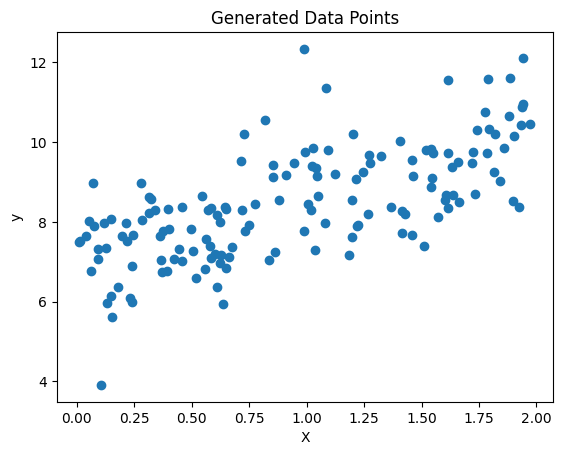

w1:1.682 w0:6.856
Gradient Descent Total Cost:1.0584


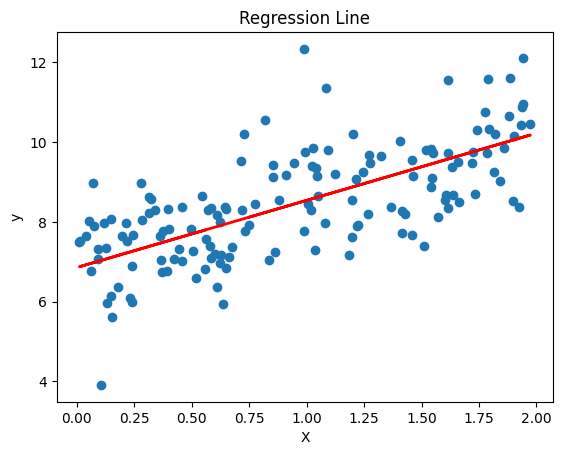

In [1]:
# 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

X = 2 * np.random.rand(150, 1)
y = 7 + 1.5 * X + np.random.randn(150, 1)

plt.scatter(X, y)
plt.title("Generated Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)

    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(X, w1) + w0
    diff = y - y_pred

    w0_factors = np.ones((N, 1))

    w1_update = -(2/N) * np.dot(X.T, diff)
    w0_update = -(2/N) * np.dot(w0_factors.T, diff)

    return w1_update, w0_update

def gradient_descent_steps(X, y, iters=1000, learning_rate=0.01):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate)
        w1 -= learning_rate * w1_update
        w0 -= learning_rate * w0_update

    return w1, w0

w1, w0 = gradient_descent_steps(X, y, iters=1000, learning_rate=0.01)
y_pred = np.dot(X, w1) + w0

print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title("Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [2]:
# 3-1
def stochastic_gradient_descent_steps(X, y, iters=1000, batch_size=10, learning_rate=0.01):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    for ind in range(iters):
        np.random.seed(ind)

        stochastic_random_index = np.random.permutation(len(y))
        sample_X = X[stochastic_random_index[:batch_size]]
        sample_y = y[stochastic_random_index[:batch_size]]

        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate)
        w1 -= learning_rate * w1_update
        w0 -= learning_rate * w0_update

    return w1, w0

In [3]:
# 3-2
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000, batch_size=10, learning_rate=0.01)
y_pred = np.dot(X, w1) + w0

print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
print("Stochastic Gradient Descent Total Cost: {:.4f}".format(get_cost(y, y_pred)))

w1: 1.664 w0: 6.857
Stochastic Gradient Descent Total Cost: 1.0582


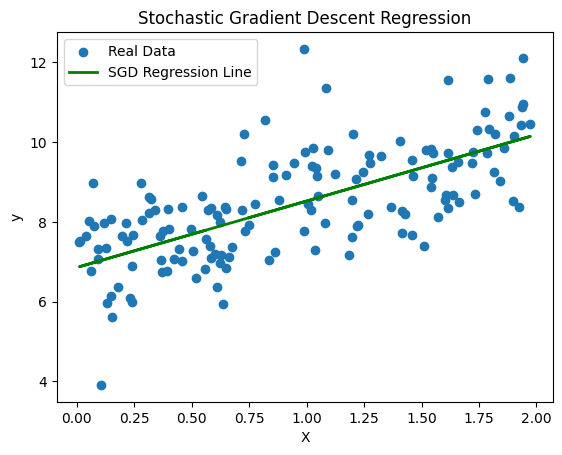

In [4]:
# 3-3
plt.scatter(X, y, label='Real Data')
plt.plot(X, y_pred, color='green', label='SGD Regression Line', linewidth=2)
plt.title("Stochastic Gradient Descent Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# 4

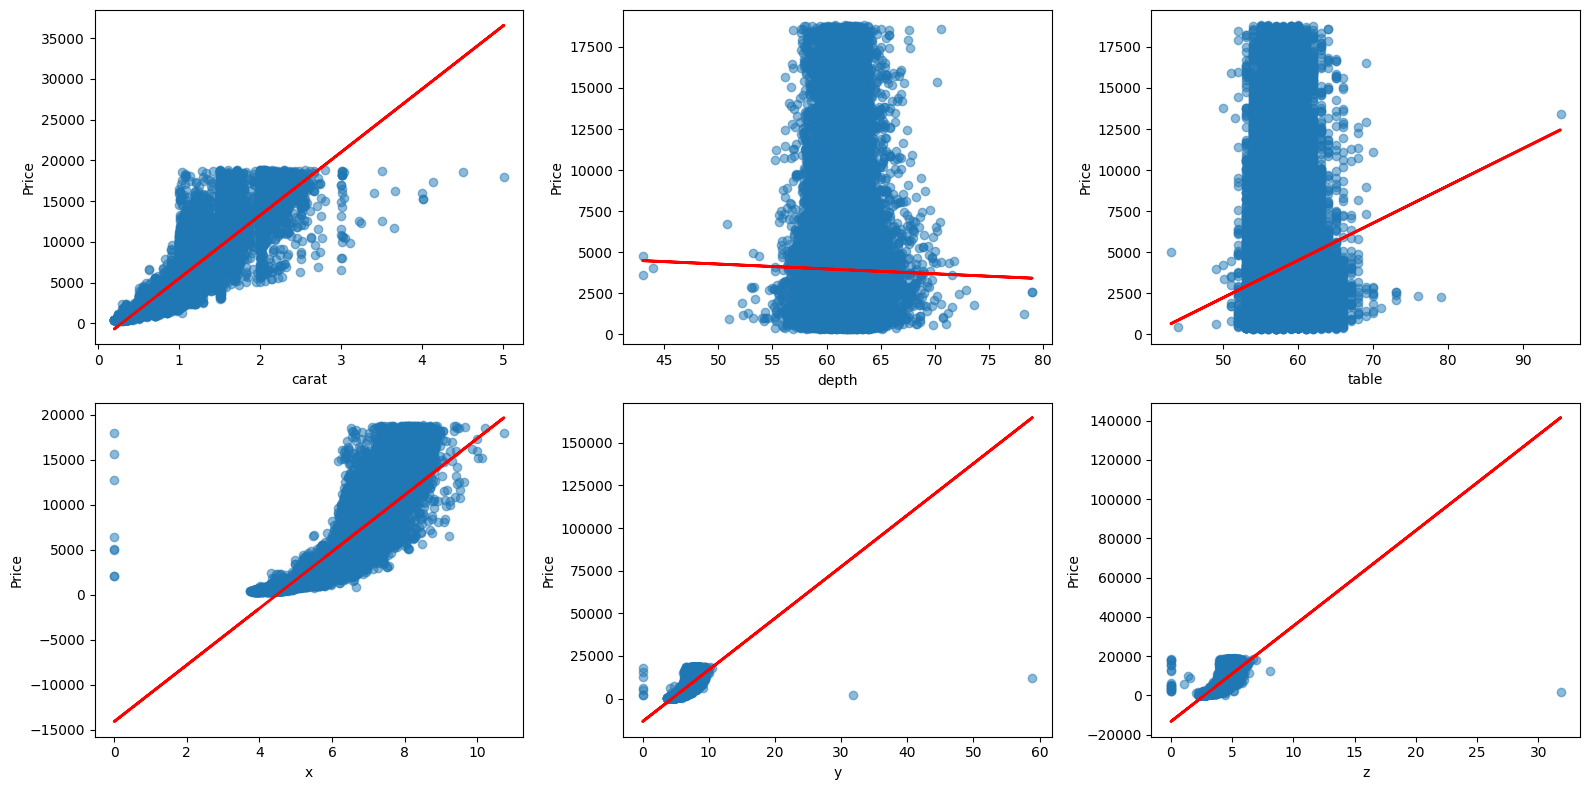

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dm = sns.load_dataset('diamonds')

fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=3)

dm_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

for i, feature in enumerate(dm_features):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(dm[feature], dm['price'], alpha=0.5)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')

    model = LinearRegression()
    X = dm[[feature]]
    y = dm['price']
    model.fit(X, y)
    y_pred = model.predict(X)
    axs[row, col].plot(dm[feature], y_pred, color='red', linewidth=2)

plt.tight_layout()
plt.show()

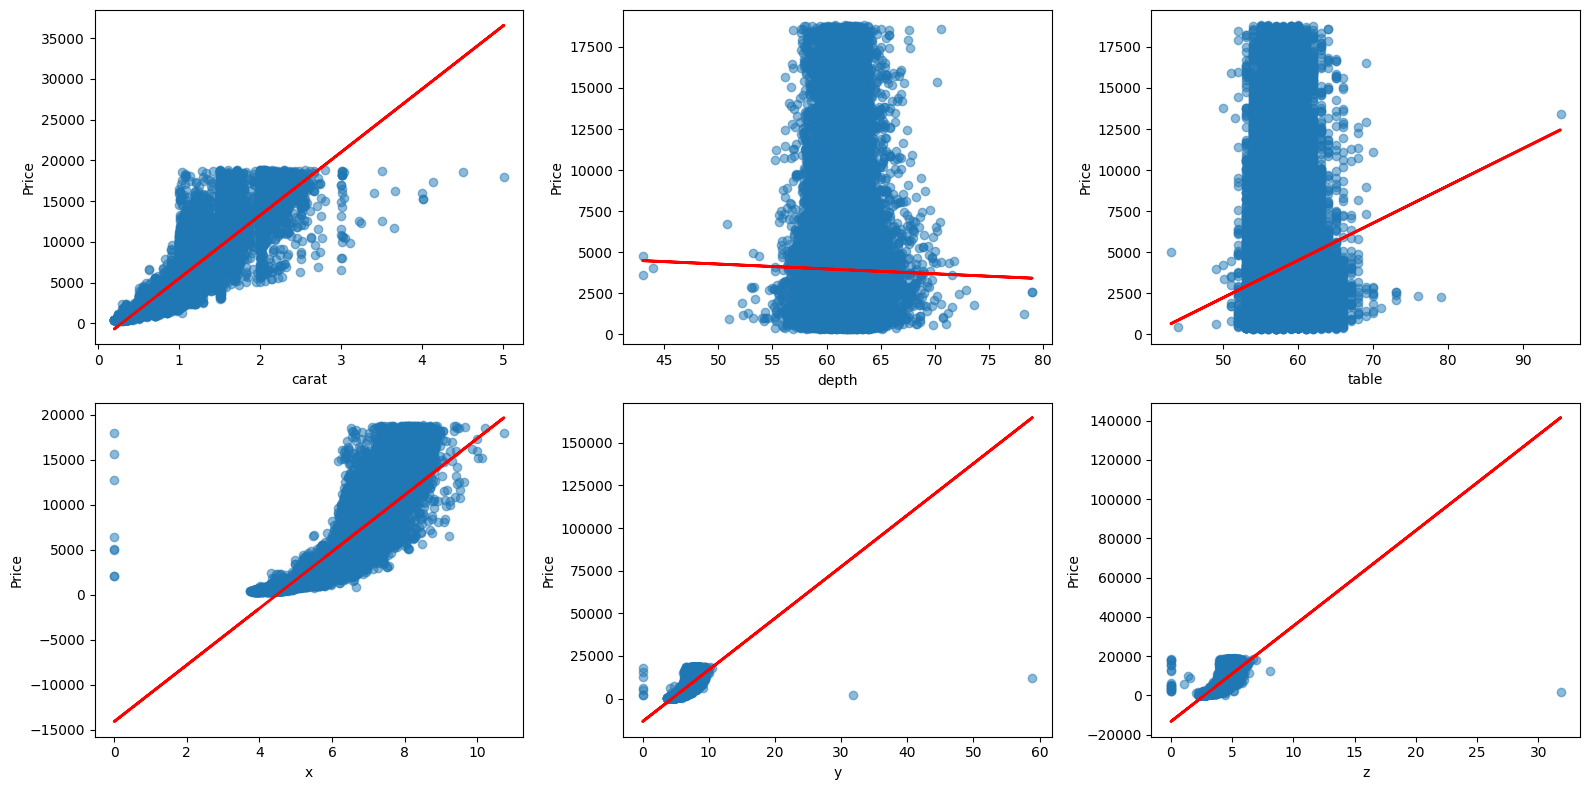

In [7]:
fig, axs = plt.subplots(figsize=(16, 8), nrows=2, ncols=3)

dm_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

for i, feature in enumerate(dm_features):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(dm[feature], dm['price'], alpha=0.5)
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')

    model = LinearRegression()
    X = dm[[feature]]
    y = dm['price']
    model.fit(X, y)
    y_pred = model.predict(X)
    axs[row, col].plot(dm[feature], y_pred, color='red', linewidth=2)

plt.tight_layout()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y_target = dm['price']
X_data = dm[['carat', 'depth', 'table', 'x', 'y', 'z']]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

model = LinearRegression()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
R2_score = r2_score(y_test, y_preds)

print('mse : {} \nrmse : {} \nr2_score : {}'.format(mse, rmse, R2_score))

mse : 2196809.5656454167 
rmse : 1482.1638120145212 
r2_score : 0.8597245333998415


In [12]:
print('절편값: ', model.intercept_)
print('회귀계수값:', np.round(model.coef_, 1))

절편값:  20898.787359062022
회귀계수값: [10652.3  -206.6   -99.8 -1342.6    64.8    98.8]


In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 MSE scores:', np.round(-neg_mse_scores, 2))
print('5 folds 의 RMSE scores:', np.round(rmse_scores, 2))

5 folds 의 MSE scores: [ 1937733.8   3139262.32 11750783.15   215220.13   593214.31]
5 folds 의 RMSE scores: [1392.03 1771.8  3427.94  463.92  770.2 ]


In [ ]:
# 5

In [15]:
import numpy as np

def true_fun(x):
    return np.sin(2 * np.pi * x)

X = np.sort(np.random.rand(50))
y = true_fun(X) + np.random.randn(50) * 0.1

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

degree = 4
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("lin_reg", LinearRegression())
])

model.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=4)),
                ('lin_reg', LinearRegression())])

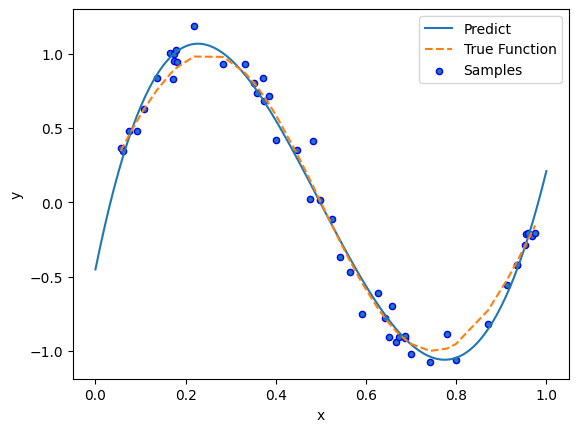

In [17]:
import matplotlib.pyplot as plt

X_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_predict = model.predict(X_test)

plt.plot(X_test, y_predict, label="Predict")
plt.plot(X, true_fun(X), '--', label="True Function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# 5-3

과소적합은 모델이 데이터의 패턴을 잘 학습하지 못할 때 발생하며 과대적합은 훈련데이터에 과도하게 학습하는 경우에 발생함. 최적의 모델은 편향과 분석이 모두 적절하게 낮은 수준일 때, 둘 사이의 균형이 잘 맞는 지점에서 발생함. 이는 모델이 충분히 복잡하여 학습은 잘 하되 과도하게 훈련 데이터에 의존하지 않는 상황임.

In [18]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

california = fetch_california_housing()
californiaDF = pd.DataFrame(california.data, columns=california.feature_names)
californiaDF['PRICE'] = california.target

y_target = californiaDF['PRICE']
X_data = californiaDF.drop(['PRICE'], axis=1, inplace=False)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0.01, 0.1, 1, 10]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-neg_mse))
    print(f'alpha {alpha} 일 때 평균 RMSE = {avg_rmse:.3f}')

alpha 0.01 일 때 평균 RMSE = 0.726
alpha 0.1 일 때 평균 RMSE = 0.726
alpha 1 일 때 평균 RMSE = 0.726
alpha 10 일 때 평균 RMSE = 0.726


In [20]:
from sklearn.linear_model import Lasso

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    neg_mse = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-neg_mse))
    print(f'alpha {alpha} 일 때 평균 RMSE = {avg_rmse:.3f}')

alpha 0.01 일 때 평균 RMSE = 0.728
alpha 0.1 일 때 평균 RMSE = 0.823
alpha 1 일 때 평균 RMSE = 1.157
alpha 10 일 때 평균 RMSE = 1.157


릿지 회귀는 L2 규제를 적용하며, 라쏘 회귀는 L1 규제를 적용함

In [21]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

elastic = ElasticNet(alpha=0.1, l1_ratio=0.7, max_iter=10000)
elastic.fit(X_train, y_train)

y_pred = elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'ElasticNet RMSE: {rmse:.3f}')

ElasticNet RMSE: 0.808


In [ ]:
# 7

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

    print('solver: {}, accuracy: {:.3f}, roc_auc: {:.3f}'.format(
        solver,
        accuracy_score(y_test, lr_preds),
        roc_auc_score(y_test, lr_preds_proba)
    ))

solver: lbfgs, accuracy: 0.953, roc_auc: 0.995
solver: liblinear, accuracy: 0.947, roc_auc: 0.994
solver: newton-cg, accuracy: 0.953, roc_auc: 0.995
solver: sag, accuracy: 0.953, roc_auc: 0.995
solver: saga, accuracy: 0.953, roc_auc: 0.995


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10],
    'solver': ['liblinear']
}

lr_clf = LogisticRegression(max_iter=600)

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(X_train, y_train)

print('최적 하이퍼 파라미터: {}, 최적 평균 정확도: {:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도: 0.972


penalty 는 정규화 방법을 지정함. L1은 불필요한 변수를 제거하며 L2는 모든 변수를 유지하면서 계수만 축소함.
C 는 규제 강도 조절 파라미터의 역수로 작을수록 규제가 강해져 단순한 모델이 됨(과대적합 방지).

In [ ]:
# 8

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

diabetes = load_diabetes()
diabetesDF = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetesDF['target'] = diabetes.target

y = diabetesDF['target']
X = diabetesDF.drop('target', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg = LinearRegression()
tr_reg = DecisionTreeRegressor(max_depth=2)

X_test_bmi = np.arange(-0.1, 0.1, 0.002).reshape(-1, 1)

diabetes_sample = diabetesDF[['bmi', 'target']].sample(n=100, random_state=0)
X_feature = diabetes_sample['bmi'].values.reshape(-1, 1)
y_target = diabetes_sample['target'].values.reshape(-1, 1)

In [29]:
lr_reg.fit(X_feature, y_target)
tr_reg.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test_bmi)
pred_tr = tr_reg.predict(X_test_bmi)

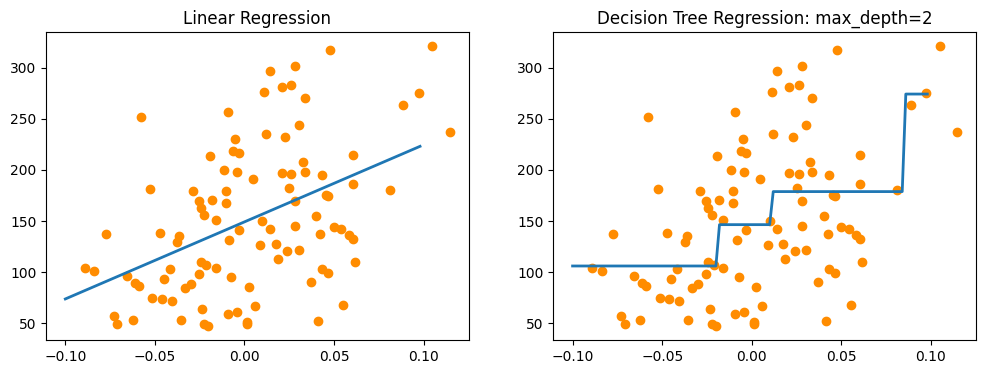

In [30]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

ax1.set_title('Linear Regression')
ax1.scatter(X_feature, y_target, c="darkorange")
ax1.plot(X_test_bmi, pred_lr, label="Linear", linewidth=2)

ax2.set_title('Decision Tree Regression: max_depth=2')
ax2.scatter(X_feature, y_target, c="darkorange")
ax2.plot(X_test_bmi, pred_tr, label="Tree", linewidth=2)

plt.show()